In [1]:
# Install required libraries
!pip install wordcloud seaborn textblob

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from collections import Counter
import re

# Load CSV
from google.colab import files
uploaded = files.upload()
for filename in uploaded.keys():
    df = pd.read_csv(filename)




Saving train_product_data.csv to train_product_data.csv


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-2-807222c76276>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=word_freq_df, palette='viridis')


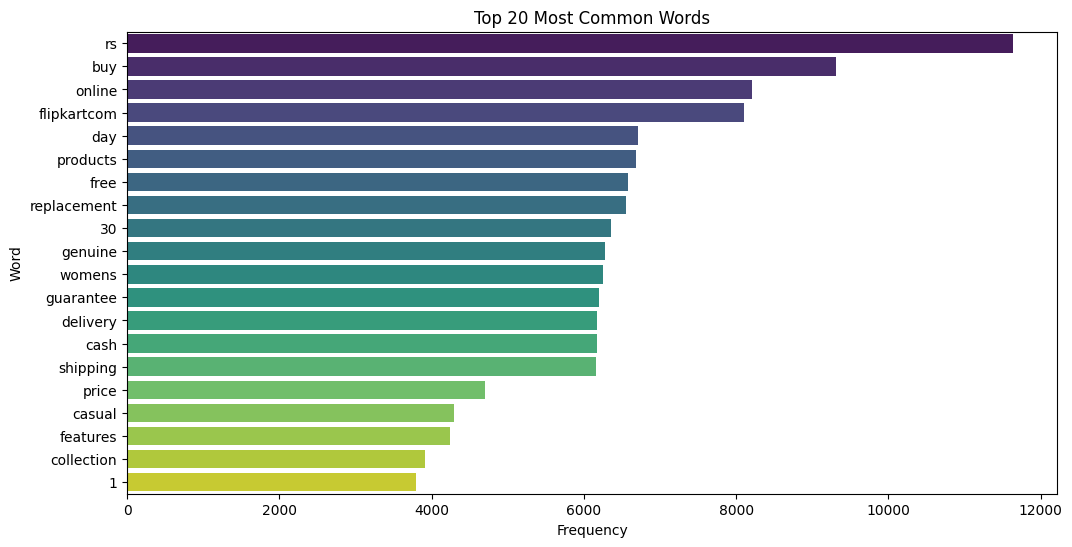

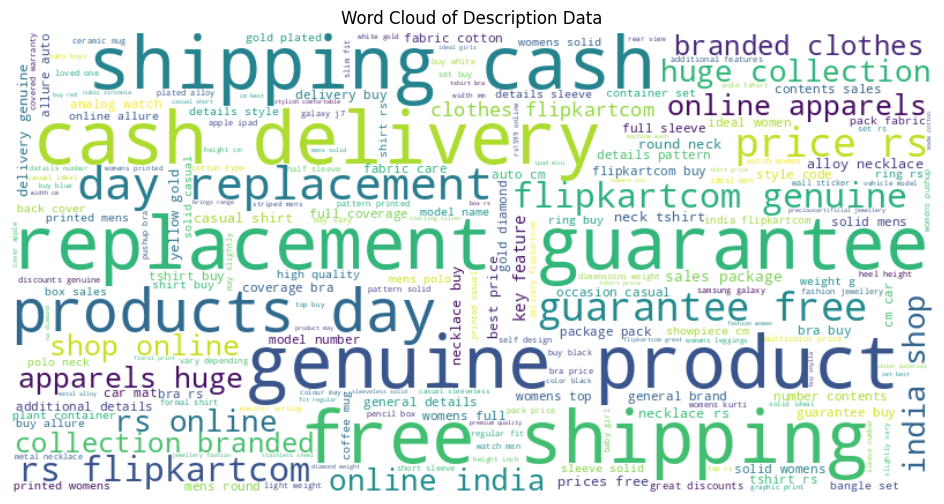

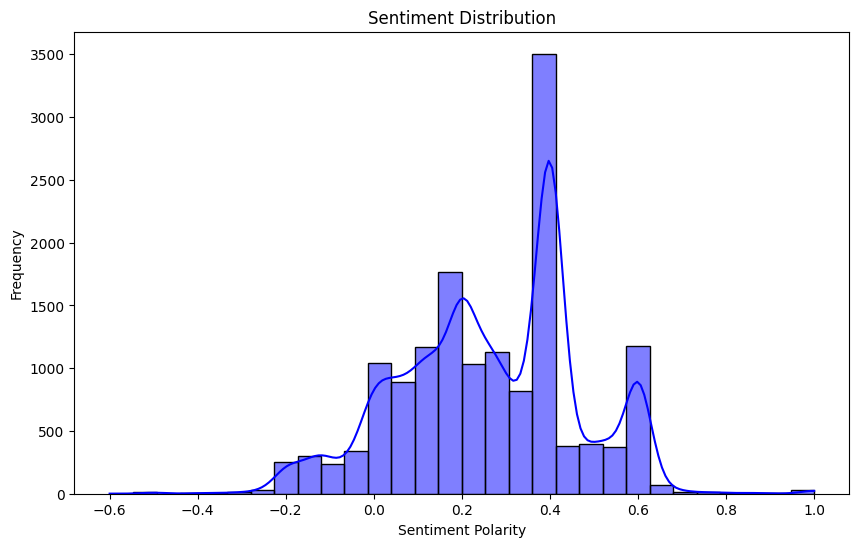

In [2]:
# Importing the Natural Language Toolkit (nltk) library
import nltk
# Importing the 'stopwords' corpus from nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')

# Preprocess the Data
# Handle missing values: drop rows with missing description
df.dropna(subset=['description'], inplace=True)

# Clean and transform the description data
def clean_description(description):
    # Remove punctuation and make it lowercase
    description = re.sub(r'[^\w\s]', '', description.lower())
    return description

df['cleaned_description'] = df['description'].apply(clean_description)

# Remove stop words
stop_words = set(stopwords.words('english'))

def remove_stop_words(description):
    words = description.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

#Apply remove stop words
df['filtered_description'] = df['cleaned_description'].apply(remove_stop_words)

# Optional: Remove rows with description length less than 3 characters
df = df[df['filtered_description'].str.len() > 3]

# Visualize the Data
# Generate word frequencies
all_description = ' '.join(df['filtered_description'].astype(str))
word_freq = Counter(all_description.split())
most_common_words = word_freq.most_common(20)
word_freq_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Visualize word frequencies
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=word_freq_df, palette='viridis')
plt.title('Top 20 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_description)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud of Description Data')
plt.show()

# Sentiment analysis
df['sentiment'] = df['filtered_description'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualize sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=30, kde=True, color='blue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

    00  000  00032nl  0008m  001  0010m  0011m  0012  0018m  0019  ...  \
0  0.0  0.0      0.0    0.0  0.0    0.0    0.0   0.0    0.0   0.0  ...   
1  0.0  0.0      0.0    0.0  0.0    0.0    0.0   0.0    0.0   0.0  ...   
2  0.0  0.0      0.0    0.0  0.0    0.0    0.0   0.0    0.0   0.0  ...   
3  0.0  0.0      0.0    0.0  0.0    0.0    0.0   0.0    0.0   0.0  ...   
4  0.0  0.0      0.0    0.0  0.0    0.0    0.0   0.0    0.0   0.0  ...   

   zt3464ea  zt3465ea  zte  zuhi  zunia  zw101  zw111  zwart  zyxel   ºc  
0       0.0       0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  0.0  
1       0.0       0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  0.0  
2       0.0       0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  0.0  
3       0.0       0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  0.0  
4       0.0       0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  0.0  

[5 rows x 23973 columns]


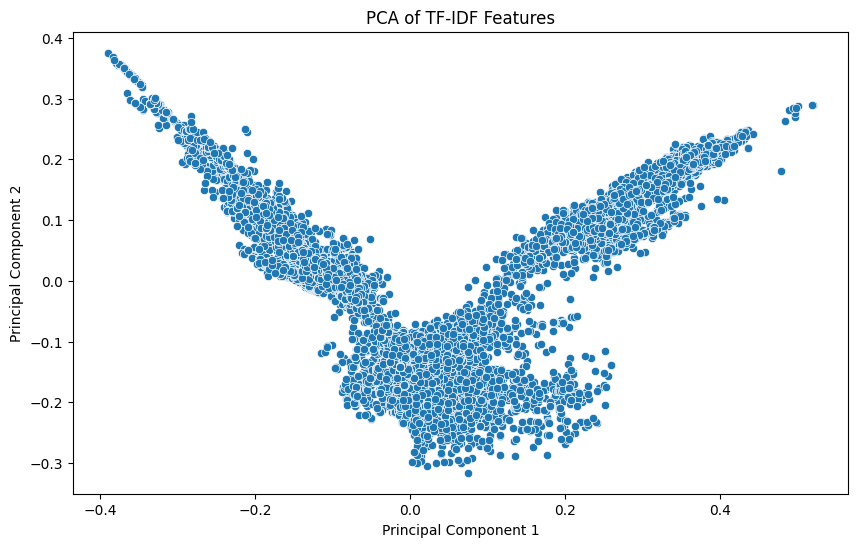

In [3]:
# Feature Engineering: TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import seaborn as sns

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['filtered_description'])

# Convert TF-IDF matrix to DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Example: Display the first 5 rows of the TF-IDF DataFrame
print(tfidf_df.head())

# Optional: Dimensionality reduction for visualization (e.g., PCA)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])

# Visualize the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2')
plt.title('PCA of TF-IDF Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Class Distribution:
 product_category_tree
Clothing                       5315
Jewellery                      3218
Footwear                       1083
Automotive                      937
Mobiles & Accessories           768
Home Decor & Festive Needs      714
Kitchen & Dining                610
Computers                       531
Watches                         526
Tools & Hardware                379
Toys & School Supplies          271
Pens & Stationery               264
Baby Care                       224
Bags, Wallets & Belts           158
Name: count, dtype: int64


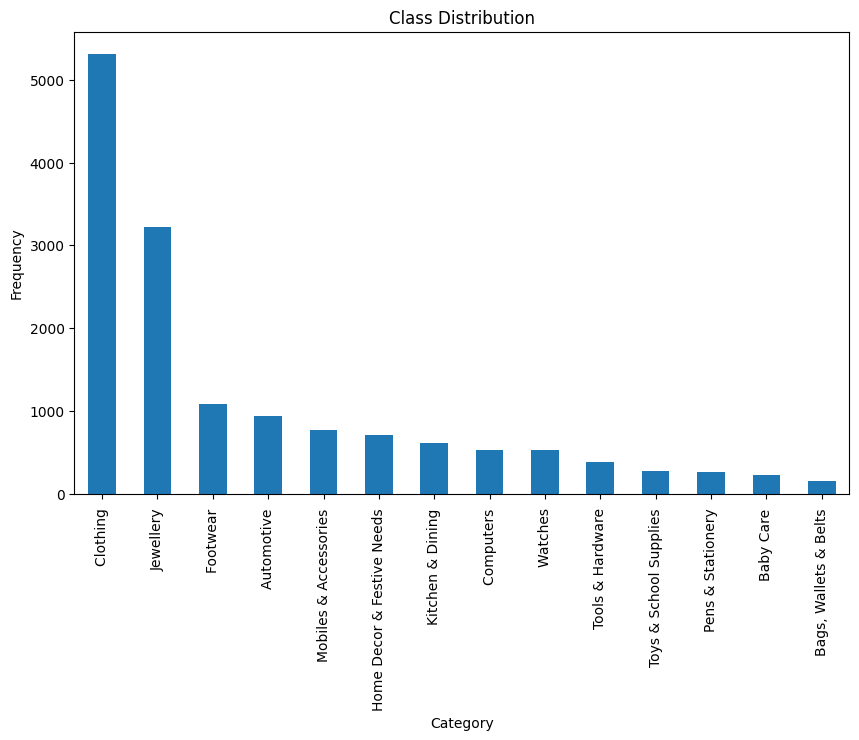

In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE


# Example: Assuming 'category' is the target variable and 'filtered_description' is the feature
X = df['filtered_description']
y = df['product_category_tree']

# Detect class imbalance
class_counts = y.value_counts()
print("Class Distribution:\n", class_counts)

# Visualize class distribution
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()


In [7]:
# Install necessary libraries
!pip install scikit-learn imbalanced-learn tensorflow

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Assuming 'filtered_description' is the feature and 'product_category_tree' is the target variable
X = df['filtered_description']
y = df['product_category_tree']

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 3: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Step 4: Train the Random Forest model on the resampled data
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Step 5: Make predictions and evaluate the model
y_pred = rf_classifier.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))


                             precision    recall  f1-score   support

                Automotive        0.94      0.98      0.96       187
                 Baby Care        0.88      0.82      0.85        45
     Bags, Wallets & Belts        0.89      0.77      0.83        31
                  Clothing        0.99      1.00      0.99      1063
                 Computers        0.86      0.75      0.80       106
                  Footwear        0.90      0.93      0.91       217
Home Decor & Festive Needs        0.94      0.99      0.97       143
                 Jewellery        0.99      0.99      0.99       644
          Kitchen & Dining        0.90      0.93      0.91       122
     Mobiles & Accessories        0.94      0.97      0.96       154
         Pens & Stationery        0.89      0.64      0.75        53
          Tools & Hardware        1.00      0.95      0.97        76
    Toys & School Supplies        0.78      0.87      0.82        54
                   Watches       

In [8]:
from sklearn.metrics import classification_report, accuracy_score
# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Evaluate Random Forest Classifier
y_pred_rf = rf_classifier.predict(X_test_tfidf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier Metrics:
Accuracy: 0.9607
                             precision    recall  f1-score   support

                Automotive        0.98      0.99      0.99       187
                 Baby Care        0.97      0.69      0.81        45
     Bags, Wallets & Belts        0.95      0.68      0.79        31
                  Clothing        0.98      1.00      0.99      1063
                 Computers        0.91      0.75      0.82       106
                  Footwear        0.88      0.96      0.92       217
Home Decor & Festive Needs        0.95      0.97      0.96       143
                 Jewellery        0.99      0.99      0.99       644
          Kitchen & Dining        0.90      0.98      0.94       122
     Mobiles & Accessories        0.96      0.97      0.97       154
         Pens & Stationery        0.93      0.49      0.64        53
          Tools & Hardware        0.99      0.96      0.97        76
    Toys & School Supplies        0.73      0.89   

In [9]:
# ... other imports ...
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential  # Import Sequential from Keras
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf

# Encode the target variable for Deep Learning
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Build and train a Deep Learning model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train_tfidf.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_categorical.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_tfidf.toarray(), y_categorical, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate Deep Learning model
y_pred_dl_probs = model.predict(X_test_tfidf.toarray())
y_pred_dl_classes = tf.argmax(y_pred_dl_probs, axis=1)
y_pred_dl_labels = label_encoder.inverse_transform(y_pred_dl_classes)
accuracy_dl = accuracy_score(y_test, y_pred_dl_labels)
print("Deep Learning Model Metrics:")
print(f"Accuracy: {accuracy_dl:.4f}")
print(classification_report(y_test, y_pred_dl_labels))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 68s 221ms/step - accuracy: 0.2779 - loss: 2.3042 - val_accuracy: 0.4042 - val_loss: 1.9156
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 83s 225ms/step - accuracy: 0.3077 - loss: 2.1036 - val_accuracy: 0.3713 - val_loss: 1.9700
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 81s 224ms/step - accuracy: 0.3836 - loss: 1.8973 - val_accuracy: 0.3700 - val_loss: 2.0471
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 79s 216ms/step - accuracy: 0.4859 - loss: 1.6193 - val_accuracy: 0.2867 - val_loss: 2.2164
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 83s 220ms/step - accuracy: 0.5849 - loss: 1.3526 - val_accuracy: 0.2683 - val_loss: 2.3849
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 82s 219ms/step - accuracy: 0.6424 - loss: 1.1209 - val_accuracy: 0.2817 - val_loss: 2.5389
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 82s 220ms/step - accuracy: 0.6926 - loss: 0.9720 - val_accuracy: 0.2896 - val_loss: 2.6482
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 84s 228ms/step - accuracy: 0.7169 - loss: 0

##As Deep learning model is giving less accuracy after getting more resources, we will continue with random forest

In [10]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           scoring='f1_macro',
                           n_jobs=-1)

# Fit the model
grid_search.fit(X_train_tfidf, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_rf_model = grid_search.best_estimator_
y_pred_rf_best = best_rf_model.predict(X_test_tfidf)
print("Random Forest Best Model Metrics:")
print(classification_report(y_test, y_pred_rf_best))


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best F1 Score: 0.9114810536431261
Random Forest Best Model Metrics:
                             precision    recall  f1-score   support

                Automotive        0.98      0.99      0.99       187
                 Baby Care        0.97      0.69      0.81        45
     Bags, Wallets & Belts        0.95      0.68      0.79        31
                  Clothing        0.98      1.00      0.99      1063
                 Computers        0.91      0.75      0.82       106
                  Footwear        0.88      0.96      0.92       217
Home Decor & Festive Needs        0.95      0.97      0.96       143
                 Jewellery        0.99      0.99      0.99       644
          Kitchen & Dining        0.90      0.98      0.94       122
     Mobiles & Accessories        0.96      0.97      0.97       154
         Pens & Stationery        0.93      0.49      0.64        5

In [11]:
# Step 1: Upload the test data CSV file
uploaded_test_file = files.upload()

# Read the uploaded file into a DataFrame
for filename in uploaded_test_file.keys():
    test_df = pd.read_csv(filename)



Saving test_data.csv to test_data.csv


In [12]:
# Preprocess the test data
test_X = test_df['description']
test_X_tfidf = tfidf_vectorizer.transform(test_X)

# Make Predictions on the Test Data

# Predict using the best Random Forest model
test_y_pred_rf = best_rf_model.predict(test_X_tfidf)
print("Random Forest Predictions on Test Data:")
print(test_y_pred_rf)


Random Forest Predictions on Test Data:
['Jewellery ' 'Jewellery ' 'Mobiles & Accessories ' ...
 'Home Decor & Festive Needs ' 'Home Decor & Festive Needs '
 'Home Decor & Festive Needs ']


In [13]:
results_df = pd.DataFrame({
    'Product Name': test_df['product_name'],  # Replace 'product_name' with the actual column name
    'Predicted Category (Random Forest)': test_y_pred_rf,
})

print("Predictions on Test Data:")
print(results_df)

Predictions on Test Data:
                                    Product Name  \
0                         V&V ART Brass Bracelet   
1                   Kalpaveda Copper Copper Cuff   
2     Thelostpuppy Book Cover for Apple iPad Air   
3                     Riana Copper Copper Bangle   
4              Inox Jewelry Stainless Steel Cuff   
...                                          ...   
2529              WallDesign Small Vinyl Sticker   
2530     Wallmantra Large Vinyl Stickers Sticker   
2531     Elite Collection Medium Acrylic Sticker   
2532     Elite Collection Medium Acrylic Sticker   
2533     Elite Collection Medium Acrylic Sticker   

     Predicted Category (Random Forest)  
0                            Jewellery   
1                            Jewellery   
2                Mobiles & Accessories   
3                            Jewellery   
4                            Jewellery   
...                                 ...  
2529        Home Decor & Festive Needs   
2530        H

In [14]:
# Step 1: Upload the correct predictions CSV file
uploaded_correct_file = files.upload()

# Read the uploaded file into a DataFrame
for filename in uploaded_correct_file.keys():
    correct_df = pd.read_csv(filename)

# Display the first few rows of the correct predictions DataFrame
print(correct_df.head())

# Extract the correct categories and predicted categories
correct_categories = correct_df['product_category_tree']  # Replace with the actual column name
predicted_categories_rf = test_y_pred_rf  # Random Forest predictions


Saving test_results.csv to test_results.csv
    product_category_tree
0              Jewellery 
1              Jewellery 
2  Mobiles & Accessories 
3              Jewellery 
4              Jewellery 


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for Random Forest
accuracy_rf = accuracy_score(correct_categories, predicted_categories_rf)
precision_rf = precision_score(correct_categories, predicted_categories_rf, average='weighted')
recall_rf = recall_score(correct_categories, predicted_categories_rf, average='weighted')
f1_rf = f1_score(correct_categories, predicted_categories_rf, average='weighted')

print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")

Random Forest Metrics:
Accuracy: 0.8110
Precision: 0.8491
Recall: 0.8110
F1 Score: 0.7786


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
